# Расчет проводимости трубопроводов с помощью МУК

In [1]:
import os
import math
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt

## Абстрактный класс

In [2]:
class Tube:
    def __init__(L):
        self.L = L
    
    def no_splitting(self, l_1 : int = 2, l_2 : int = 2) -> float:
        phi_12 = self.coaxial(self.L, l_1, l_2)
        phi_21 = phi_12
        phi_11, phi_22 = 0, 0
        phi_13 = 1 - phi_11 - phi_12
        
        phi_31 = phi_13 * self.area_1() / self.area_3(self.L)
        phi_32 = phi_31
        phi_33 = 1 - phi_31 - phi_32
        
        k = phi_12 + phi_13 * phi_32 / ( 1 - phi_33 )
        return k
    
    def splitting(self, l_1 : int = 2, l_2 : int = 2) -> float:
        phi_11, phi_55 = 0, 0
        phi_15 = self.coaxial(self.L/2, l_1, l_2)
        phi_51 = phi_15
        phi_13 = 1 - phi_11 - phi_15

        phi_31 = phi_13 * self.area_1() / self.area_3(self.L/2)
        phi_35 = phi_31
        phi_33 = 1 - phi_31 - phi_35
        phi_53 = 1 - phi_55 - phi_51
        
        phi_52, phi_25 = phi_15, phi_15
        phi_54 = phi_13

        phi_45, phi_42 = phi_31, phi_31
        phi_44 = phi_33
        phi_24 = phi_53
        
        x = phi_54*phi_42/(1 - phi_44) + phi_52
        y = phi_13*phi_35/(1 - phi_33) + phi_15
        z = 1 - phi_53*phi_35/(1 - phi_33) * phi_54*phi_45/(1 - phi_44)
        k = x*y/z
        return k

## Круглое сечение

### Без разбиения

In [3]:
class Round(Tube):
    def __init__(self, L, R = 1):
        self.R = R
        self.L = L
        
    def coaxial_discs(self, s) -> float:
        x = s**2 + self.R**2 + self.R**2
        return 1/(2*self.R**2) * ( x - math.sqrt(x**2 - 4*self.R**2 * self.R**2) )
    
    def coaxial(self, s, l_1 = 2, l_2 = 2) -> float:
        return self.coaxial_discs(s)
    
    def area_1(self):
        return math.pi * self.R**2
    
    def area_3(self, s):
        if s:
            return 2*math.pi*self.R * s
        return 1

In [4]:
tube_1 = Round(2)
round(tube_1.no_splitting(),3)

0.586

### С разбиением

In [5]:
round(tube_1.splitting(),3)

0.528

### Графики

In [6]:
def name(title):
    if title:
        plt.title(title, color= "red")

def save(filename, dirname):
    if dirname and (not os.path.isdir(dirname)):
        os.mkdir(dirname)
    os.chdir(dirname)
    
    if filename:
        plt.savefig(filename)
    os.chdir("..")

def round_t(x):
    k_1 = [Round(element, 1/2).no_splitting() for element in x]
    k_2 = [Round(element, 1/2).splitting()    for element in x]
    return k_1, k_2

def lines(x, k_1, k_2, filename = "", dirname = "", k = []):
    plt.scatter(x, k_1, label= "Без разбиения", marker="o")
    plt.plot(x, k_1)
        
    plt.scatter(x, k_2, label= "С разбиением" , marker="o")
    plt.plot(x, k_2)
    
    if len(k) and (type(k) is np.ndarray):
        plt.scatter(x, k, label= "Теоретический", marker="o")
        plt.plot(x, k)
    plt.legend()
    save(filename, dirname)

def customize_graph(title = "", label_x = ""):
    fig = plt.figure(figsize=(12,9))
    ax  = fig.add_subplot(111)
    ax.tick_params(axis="x", colors="red")
    ax.tick_params(axis="y", colors="red")
    
    plt.grid()
    plt.xlabel(label_x, color="red")
    plt.ylabel('k'  , color="red")
    
    name(title)


In [7]:
class Graph:
    def __init__(self):
        # данные взяты из ссылки №2 Links.txt
        k = [1, 0.9092, 0.8341, 0.7711, 0.7177, 0.6720, 0.6320, 0.5970, 0.5659, 0.5384, 0.5136, 0.4914, 0.4711]
        k+= [0.4527, 0.4359, 0.4205, 0.4062, 0.3931, 0.3809, 0.3695, 0.3589, 0.3146, 0.2807, 0.2537, 0.2316]
        k+= [0.2131, 0.1973, 0.1719, 0.1523, 0.1367, 0.1240, 0.1135]
        k = np.array(k)
        
        self.k = k
        return
        
    def round_draw(self):
        customize_graph("Проводимость в круглом сечении при L/d < 2", "L/d")
        x        = np.linspace(0,2,21)
        k_1, k_2 = round_t(x)
        lines(x, k_1, k_2, "L less then 2.png", "round", self.k[:21])
        plt.show()
        
        customize_graph("Проводимость в круглом сечении при L/d < 5", "L/d")
        x        = np.linspace(2,5,7)
        k_1, k_2 = round_t(x)
        lines(x, k_1, k_2, "L less then 5.png", "round", self.k[20:27])
        plt.show()
        
        customize_graph("Проводимость в круглом сечении при L/d < 10", "L/d")
        x        = np.linspace(5,10,6)
        k_1, k_2 = round_t(x)
        lines(x, k_1, k_2, "L less then 10.png", "round", self.k[26:])
        plt.show()
        

C:\Users\ASUS\AppData\Local\Temp/ipykernel_9320/1149969780.py:15: RuntimeWarning: invalid value encountered in double_scalars
  k = phi_12 + phi_13 * phi_32 / ( 1 - phi_33 )
C:\Users\ASUS\AppData\Local\Temp/ipykernel_9320/1149969780.py:36: RuntimeWarning: invalid value encountered in double_scalars
  x = phi_54*phi_42/(1 - phi_44) + phi_52
C:\Users\ASUS\AppData\Local\Temp/ipykernel_9320/1149969780.py:37: RuntimeWarning: invalid value encountered in double_scalars
  y = phi_13*phi_35/(1 - phi_33) + phi_15
C:\Users\ASUS\AppData\Local\Temp/ipykernel_9320/1149969780.py:38: RuntimeWarning: invalid value encountered in double_scalars
  z = 1 - phi_53*phi_35/(1 - phi_33) * phi_54*phi_45/(1 - phi_44)


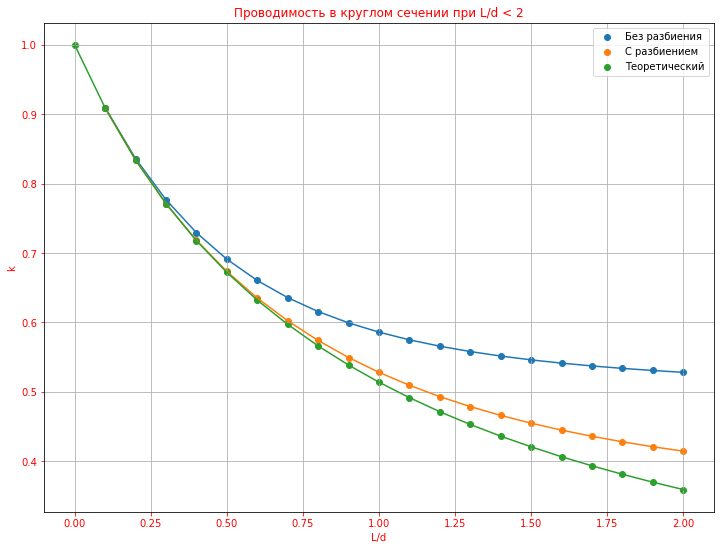

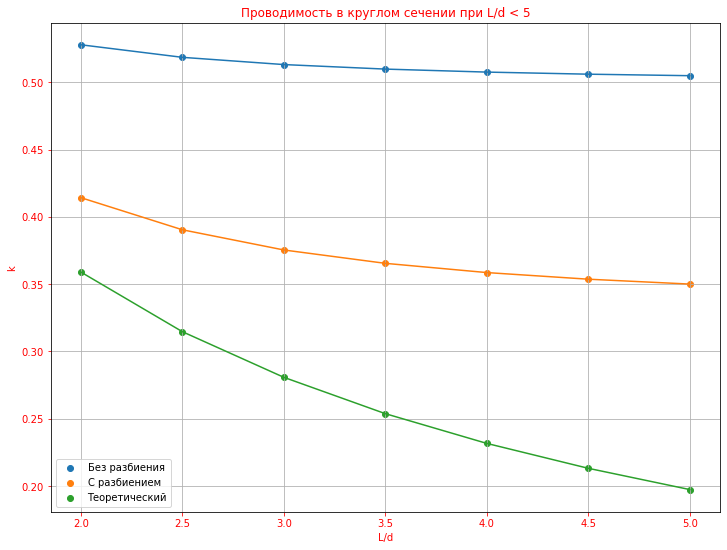

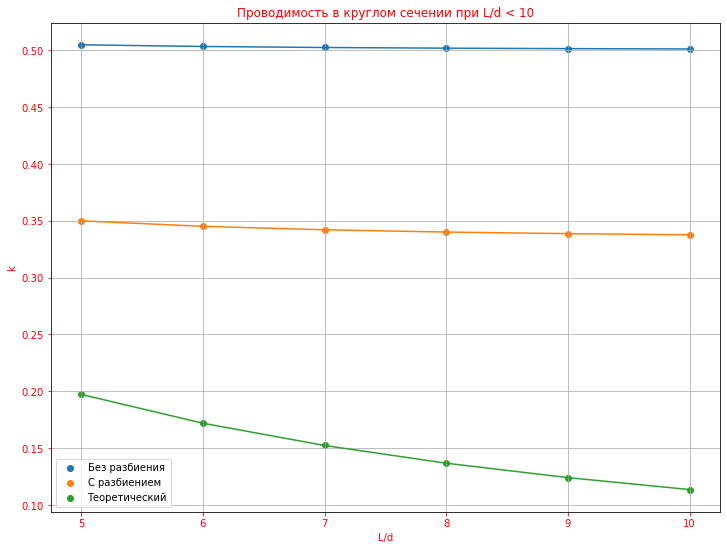

In [8]:
graph = Graph()
graph.round_draw()

## Прямоугольное сечение

### Без разбиения

In [9]:
class Rectangular(Tube):
    def __init__(self, a, b, L):
        self.a, self.b = a, b
        self.L         = L
    
    def coaxial_rectangle(self, s, l_1 : int, l_2 : int) -> float:
        k = 0
        for i in range(l_1):
            x = self.b/(2*l_1) + self.b/l_1*i
            for j in range(l_2):
                y = self.a/(2*l_2) + self.a/l_2*j
                square_r = s**2 + (x - self.b/2)**2 + (y - self.a/2)**2
                cos_1    = s/math.sqrt(square_r)
                cos_2    = cos_1
                k += cos_1*cos_2/(math.pi*square_r)
                
        F_2 = self.a*self.b/(l_1*l_2)
        k  *= F_2
        return k
    
    def coaxial(self, s, l_1 = 2, l_2 = 2):
        return self.coaxial_rectangle(s, l_1, l_2)
    
    def area_1(self):
        return self.a*self.b
    
    def area_3(self, s):
        if s:
            return 2*(self.a+self.b)*s
        return 1

In [10]:
tube_2, tube_3 = Rectangular(1,1,1), Rectangular(1,5,1)
print(round(tube_2.no_splitting(10,10), 3))
print(round(tube_3.no_splitting(10,10), 3))

0.62
0.718


### С разбиением

In [11]:
print(tube_2.splitting(10,10))
print(tube_3.splitting(10,10))

0.6363822024158245
0.7335851045384881


### Графики

In [12]:
def rectangle_t(x, l_1, l_2, b):
    k_1 = [Rectangular(1,b,element).no_splitting(l_1, l_2) for element in x]
    k_2 = [Rectangular(1,b,element).splitting(l_1, l_2)    for element in x]
    return k_1, k_2

def rectangle_draw(self, l_1 : int = 2, l_2 : int = 2, b = 1):
        customize_graph("Пров-сть в прямоугольном сечении при L < 2 и b =" + str(b), "L")
        x        = np.linspace(0,2,21)
        k_1, k_2 = rectangle_t(x,l_1,l_2, b)
        lines(x, k_1, k_2, "L less 2 and b" + str(b) + ".png", "rectangular")
        plt.show()
        
        customize_graph("Пров-сть в прямоугольном сечении при L < 10 и b =" + str(b), "L")
        x        = np.linspace(1,10,10)
        k_1, k_2 = rectangle_t(x,l_1,l_2, b)
        lines(x, k_1, k_2, "L less 10 and b" + str(b) + ".png", "rectangular")
        plt.show()

Graph.rectangle_draw = rectangle_draw

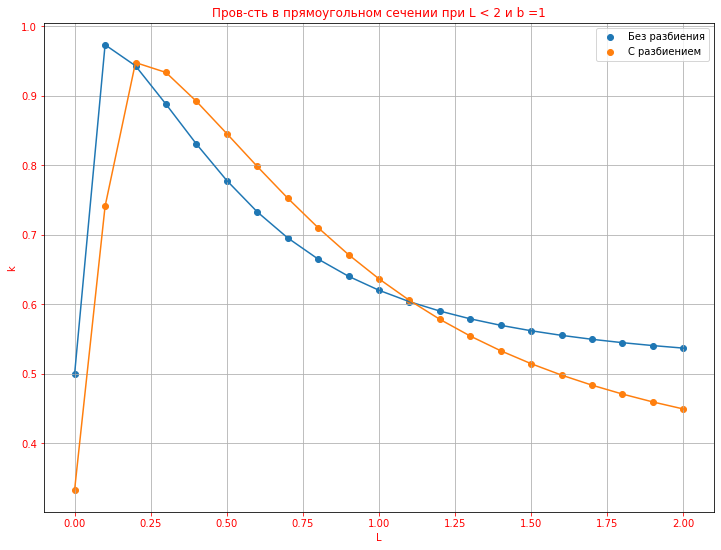

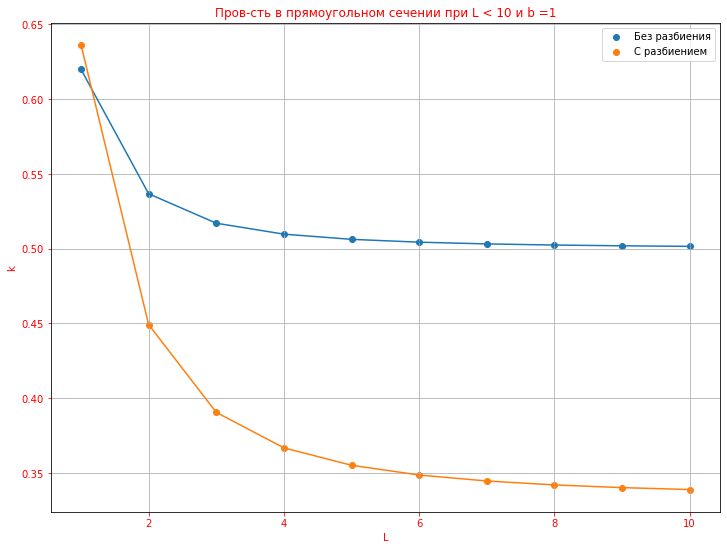

In [13]:
graph.rectangle_draw(10,10)

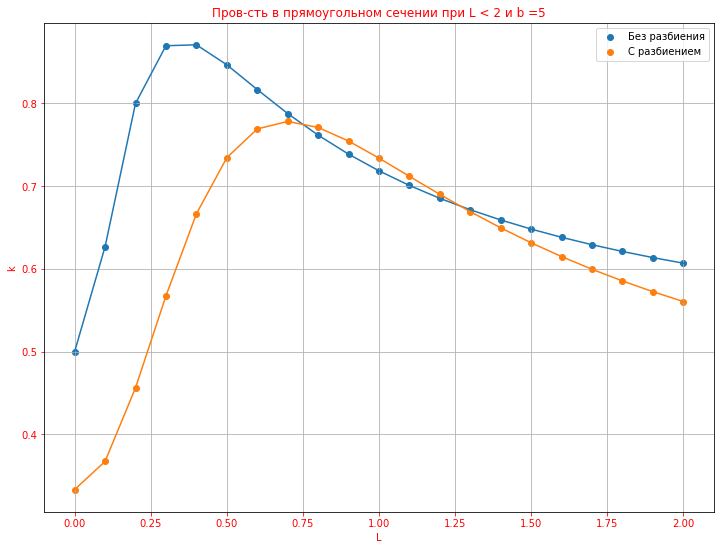

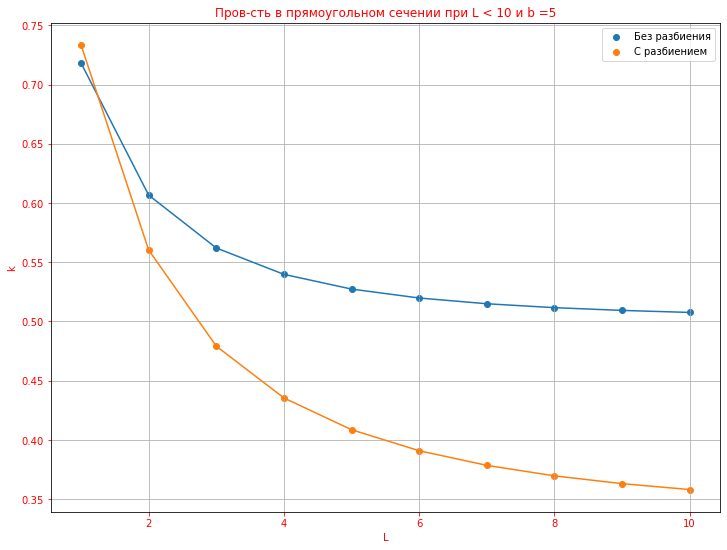

In [14]:
graph.rectangle_draw(10,10,5)